In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
#%run -i utils.py
#import seaborn as sns
#import datetime 
import statsmodels.api as sm


## Ingest the data

In [2]:
train_2016 = pd.read_csv('../data/train_2016_v2.csv')
train_2017 = pd.read_csv('../data/train_2017.csv')
train_2017.head()

,parcelid,logerror,transactiondate
0,14297519,0.025595,2017-01-01
1,17052889,0.055619,2017-01-01
2,14186244,0.005383,2017-01-01
3,12177905,-0.103410,2017-01-01
4,10887214,0.006940,2017-01-01


In [3]:
df_2016 = pd.read_csv('../data/properties_2016.csv')
df_2016.shape

/Users/sam_stone/venvs/zillow_prize/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2985217, 58)

In [4]:
df_2017 = pd.read_csv('../data/properties_2017.csv')
df_2017.shape

/Users/sam_stone/venvs/zillow_prize/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2985217, 58)

In [5]:
df_2016.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [6]:
ct_2017 = len(df_2017)
completeness = pd.DataFrame(df_2017.columns, columns=['col_name'])
completeness['type'] = completeness.apply(lambda r: df_2017[r.col_name].dtypes, axis=1)
completeness['%_null'] = completeness.apply(lambda r: df_2017[r.col_name].isnull().sum() / ct_2017, axis=1)

In [7]:
completeness.sort_values('%_null')

,col_name,type,%_null
0,parcelid,int64,0.000000
17,fips,float64,0.000982
33,propertylandusetypeid,float64,0.000982
35,rawcensustractandblock,float64,0.000982
37,regionidcounty,float64,0.000982
25,longitude,float64,0.000982
24,latitude,float64,0.000982
52,assessmentyear,float64,0.000983
5,bedroomcnt,float64,0.000987
4,bathroomcnt,float64,0.000991


In [8]:
# Do 2016 and 2017 parcel_ids match? Yes.
set(df_2016.parcelid) == set(df_2017.parcelid)

True

In [9]:
# Do assessment values differ in 2016 and 2017? Yes, by +1.5% median
df = df_2016.join(df_2017.set_index('parcelid'), on='parcelid', how='left', rsuffix='_2017')

df['delta'] = df['taxvaluedollarcnt_2017'] / df['taxvaluedollarcnt'] - 1.0
df[[
    'parcelid',
    'taxvaluedollarcnt',
    'taxvaluedollarcnt_2017',
    'delta',
]].head(5)
df.delta.median()

0.015247363301987393

In [10]:
# Does total assessment value equal structure + land value? Yes
df['assessment_value_check'] = df.taxvaluedollarcnt - df.landtaxvaluedollarcnt - df.structuretaxvaluedollarcnt
df.assessment_value_check.sum()
#df[['taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'structuretaxvaluedollarcnt', 'assessment_value_check']]

0.0

### Map Dictionary Values

In [11]:
prop_types = pd.read_excel('../data/zillow_data_dictionary.xlsx', 
                           sheet_name='PropertyLandUseTypeID', 
                           names=['propertylandusetypeid', 'prop_description'])
prop_types

,propertylandusetypeid,prop_description
0,31,Commercial/Office/Residential Mixed Used
1,46,Multi-Story Store
2,47,Store/Office (Mixed Use)
3,246,"Duplex (2 Units, Any Combination)"
4,247,"Triplex (3 Units, Any Combination)"
5,248,"Quadruplex (4 Units, Any Combination)"
6,260,Residential General
7,261,Single Family Residential
8,262,Rural Residence
9,263,Mobile Home


In [12]:
df_2017 = df_2017.join(
    prop_types.set_index('propertylandusetypeid'),
    on='propertylandusetypeid')

## Predict SFH total assessment value in 2017
- Filter to only legitimate total assessed values ($100K-$1M)
- Filter to only columns that are >90% complete (there is a natural split here)
- Imput missing data for selected columns
- Examine categorical features
- Run regression
- Features to consider adding back
 - FIPS
 - Various location features
 - Land Use Code
 - Bath counts
 

In [13]:
features = [
#     'fips', # Federal Information Processing Standard code
#     'propertylandusetypeid', # Categorical - 16 values
    'prop_description', # Categorical - 16 values
#     'rawcensustractandblock',
#     'regionidcounty',
#     'longitude',
#     'latitude',
#     'assessmentyear', #Almost 100% from 2016
    'bedroomcnt', # Exclude count > 6
    'bathroomcnt', # Exclude count > 10
    'roomcnt', # Exclude count > 20
#     'propertycountylandusecode', - Long tail, examine in more detail
#     'regionidzip',
#     'taxamount', #Data leakage?
#     'calculatedfinishedsquarefeet', #Seems to be identical to finishedsquarefeet12
    'yearbuilt',
#     'regionidcity',
#     'censustractandblock',
#     'fullbathcnt', #Consider for addback
#     'calculatedbathnbr', #Consider for addback
    'finishedsquarefeet12',
    'lotsizesquarefeet'
]

labels = [
    'taxvaluedollarcnt',
    'structuretaxvaluedollarcnt',
    'landtaxvaluedollarcnt',
]

In [14]:
# Filter on total assessed value
df = df_2017[features + labels]
df = df[(df.taxvaluedollarcnt > 100000) & (df.taxvaluedollarcnt < 1000000)]
df.describe()
df.shape

(2430767, 10)

In [15]:
#Filter on Single Family Homes 
df.prop_description.value_counts()
df = df[df.prop_description == 'Single Family Residential']
df.shape

(1741590, 10)

In [16]:
# Filter on bedroom, bathroom, and total room counts
df = df[(df.bedroomcnt <= 6) & (df.bedroomcnt >= 1)]
df = df[(df.bathroomcnt <= 10) & (df.bathroomcnt >= 1)]
df = df[(df.roomcnt <= 20)]
df.shape

(1732506, 10)

In [17]:
#Note ~70% of SFH have no rooms (except bd/br)
len(df[(df.roomcnt == 0)])

1236223

In [18]:
#Drop all rows with null values
tmp = df.dropna()
print('{:.2f}% dropped'.format((1 - len(tmp) / len(df)) * 100))
df = tmp
df.shape

0.91% dropped


(1716691, 10)

In [21]:
df.describe()

,bedroomcnt,bathroomcnt,roomcnt,yearbuilt,finishedsquarefeet12,lotsizesquarefeet,taxvaluedollarcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt
count,1.716691e+06,1.716691e+06,1.716691e+06,1.716691e+06,1.716691e+06,1.716691e+06,1.716691e+06,1.716691e+06,1.716691e+06
mean,3.288190e+00,2.178946e+00,1.939569e+00,1.961290e+03,1.776525e+03,9.861931e+03,3.870467e+05,1.537058e+05,2.333409e+05
std,8.618669e-01,8.020789e-01,3.154777e+00,2.147503e+01,6.990849e+02,7.456694e+04,2.045949e+05,9.568679e+04,1.599886e+05
min,1.000000e+00,1.000000e+00,0.000000e+00,1.801000e+03,1.000000e+00,1.040000e+02,1.000010e+05,9.000000e+00,3.000000e+01
25%,3.000000e+00,2.000000e+00,0.000000e+00,1.950000e+03,1.272000e+03,5.600000e+03,2.273230e+05,8.702300e+04,1.096450e+05
50%,3.000000e+00,2.000000e+00,0.000000e+00,1.959000e+03,1.628000e+03,6.728000e+03,3.430220e+05,1.281730e+05,1.957480e+05
75%,4.000000e+00,3.000000e+00,5.000000e+00,1.976000e+03,2.150000e+03,8.330000e+03,5.054130e+05,1.931710e+05,3.258880e+05
max,6.000000e+00,1.000000e+01,1.900000e+01,2.016000e+03,5.922000e+04,2.843090e+07,9.999990e+05,9.708360e+05,9.900000e+05


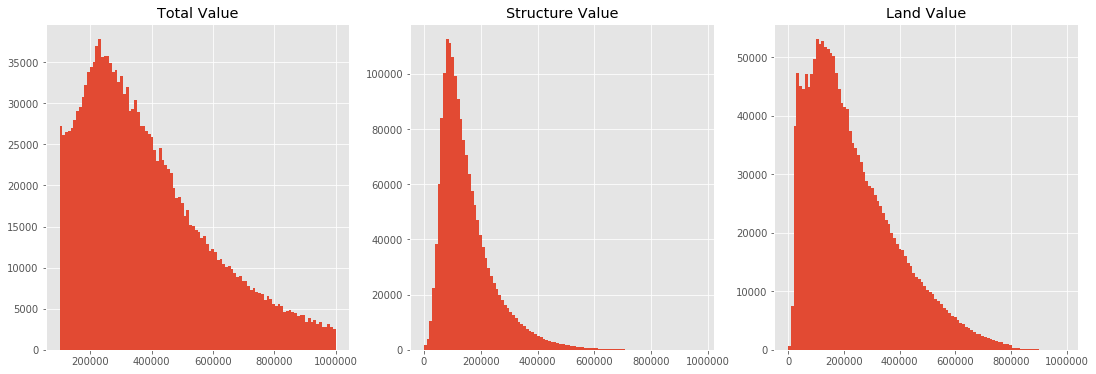

In [22]:
fig = plt.gcf()
fig.set_size_inches(18.5, 6)

plt.subplot(1,3,1)
plt.title('Total Value')
df.taxvaluedollarcnt.hist(bins=100)

plt.subplot(1,3,2)
plt.title('Structure Value')
df.structuretaxvaluedollarcnt.hist(bins=100);

plt.subplot(1,3,3)
plt.title('Land Value')
df.landtaxvaluedollarcnt.hist(bins=100);

plt.show()

## Linear Regression

In [23]:
feature_col = [
    'bedroomcnt',
    'bathroomcnt',
    'roomcnt',
    'yearbuilt',
    'finishedsquarefeet12',
    'lotsizesquarefeet'
]

target_col = 'taxvaluedollarcnt'

matrix = df[feature_col + [target_col]]
assert(matrix.isnull().sum().sum() == 0)

In [24]:
features = matrix[feature_col]
features['constant'] = 1
target = matrix[target_col]

model = sm.OLS(target, features)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      taxvaluedollarcnt   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                 7.975e+04
Date:                Wed, 12 Dec 2018   Prob (F-statistic):               0.00
Time:                        13:43:43   Log-Likelihood:            -2.3218e+07
No. Observations:             1716691   AIC:                         4.644e+07
Df Residuals:                 1716684   BIC:                         4.644e+07
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedroomcnt           -2.663e+04    212.568   -125.287      0.000    -2.7e+04   -2.62e+04
bathroomcnt           2.189e+04    303.033     72.237      0.000    2.13e+04    2.25e+04
roomcnt               2271.0877     45.594     49.811      0.000    2181.725    2360.450
yearbuilt              247.6561      7.680     32.245      0.000     232.603     262.709
finishedsquarefeet12   128.8805      0.336    383.445      0.000     128.222     129.539
lotsizesquarefeet       -0.0326      0.002    -17.586      0.000      -0.036      -0.029
constant             -2.918e+05   1.48e+04    -19.694      0.000   -3.21e+05   -2.63e+05
==============================================================================
Omnibus:                   144314.298   Durbin-Watson:                   1.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           373041.595
Skew:                           0.493   Prob(JB):                         0.00
Kurtosis:                       5.060   Cond. No.                     8.07e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.07e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""